In [5]:
!pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 3.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.7/37.7 MB 2.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 KB 2.0 MB/s eta 0:00:0000:0100:01


In [44]:
!pip install tabulate

Defaulting to user installation because normal site-packages is not writeable


In [6]:
import json
from sklearn.metrics import precision_recall_fscore_support, accuracy_score


## baseline

In [8]:
!pip install epitran

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 KB 1.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.7/781.7 KB 2.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 KB 1.1 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 3.3 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 401.8/401.8 KB 2.4 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for unicodecsv: filename=unicodecsv-0.14.1-py3-none-any.whl size=10768 sha256=4664e752f05e70798b7eb1301d086202ea42d0c5a160cad7a4104b6e286bcdb2
  Stored in directory: /home/harinie/.cache/pip/wheels/9c/ea/66/8e45247b09052a933eb1a680b7c64802298faba58aac9b346b
Successfully built unicodecsv


In [9]:
import epitran

epi_ar = epitran.Epitran('ara-Arab')  # Arabic
epi_fa = epitran.Epitran('fas-Arab')  # Persian
epi_ur = epitran.Epitran('urd-Arab')  # Urdu

print(epi_ar.transliterate("سلام"))   # Outputs IPA string

slaːm


In [12]:
sample_words = [
    "سلام", "مدرسة", "كتاب", "قلم", "لغة", "عالم", "علم", "شمس", "قمر", "نجم",
    "سماء", "أرض", "هاتف", "تفاحة", "مدينة", "شارع", "بيت", "كرسي", "طاولة", "شباك",
    "حاسوب", "مفتاح", "سفر", "وقت", "ساعة", "كلمة", "جملة", "فقرة", "درس", "باب",
    "نافذة", "مصباح", "نور", "ظلام", "جبل", "بحر", "نهر", "كتاب", "دفتر", "قصة",
    "رواية", "قانون", "نظام", "مدير", "طالب", "معلم", "صف", "فصل", "لوح", "قلم رصاص",
    "مسطرة", "ممحاة", "حقيبة", "نظارة", "كرة", "مباراة", "رياضة", "دراجة", "سيارة", "حافلة",
    "قطار", "طائرة", "مطار", "شارع", "طريق", "جسر", "حديقة", "زهرة", "شجرة", "نبات",
    "فاكهة", "موز", "تفاح", "عنب", "برتقال", "ليمون", "خضار", "جزر", "بطاطا", "طماطم",
    "ماء", "عصير", "حليب", "قهوة", "شاي", "سكر", "ملح", "خبز", "لحم", "دجاج",
    "سمك", "بيض", "جبن", "زيت", "رز", "معكرونة", "طبق", "ملعقة", "سكين", "شوكة"
]

with open("ground_truth/arabic.txt", "w", encoding="utf-8") as f:
    for word in sample_words:
        f.write(word + "\n")


In [62]:
import json
import epitran

epi_ar = epitran.Epitran('fas-Arab')

with open("ground_truth/persian.txt", "r", encoding="utf-8") as f:
    words = [line.strip() for line in f]

surrogate_gt = {}
for word in words:
    ipa = epi_ar.transliterate(word)
    surrogate_gt[word] = list(ipa)  # Treat IPA chars as pseudo-phonemes

with open("ground_truth.json", "w", encoding="utf-8") as out:
    json.dump(surrogate_gt, out, ensure_ascii=False, indent=4)

print("Saved 100 pseudo-groundtruth entries to ground_truth.json")


Saved 100 pseudo-groundtruth entries to ground_truth.json


In [63]:
import json
import epitran

epi = epitran.Epitran('ara-Arab')

with open("arabic_parsed.json", "r", encoding="utf-8") as f:
    cps_data = json.load(f)

for i, (word, cps_phonemes) in enumerate(cps_data.items()):
    ipa = epi.transliterate(word)
    print(f"{word}\n CPS: {cps_phonemes}\n IPA: {list(ipa)}\n")
    if i > 30: break


-
 CPS: ['UNK']
 IPA: ['-']

-التي
 CPS: ['UNK', 'UNK', 'l', 'UNK', 'y']
 IPA: ['-', 'a', 'ː', 'l', 't', 'i', 'ː']

-السكرتيرة
 CPS: ['UNK', 'UNK', 'l', 's', 'k', 'UNK', 'UNK', 'y', 'UNK', 'UNK']
 IPA: ['-', 'a', 'ː', 'l', 's', 'k', 'r', 't', 'i', 'ː', 'r', 'ة']

-من
 CPS: ['UNK', 'm', 'n']
 IPA: ['-', 'm', 'n']

.
 CPS: ['UNK']
 IPA: ['.']

/
 CPS: ['UNK']
 IPA: ['/']

0
 CPS: ['UNK']
 IPA: ['0']

00
 CPS: ['UNK', 'UNK']
 IPA: ['0', '0']

1
 CPS: ['UNK']
 IPA: ['1']

1,000
 CPS: ['UNK', 'UNK', 'UNK', 'UNK', 'UNK']
 IPA: ['1', ',', '0', '0', '0']

1.1
 CPS: ['UNK', 'UNK', 'UNK']
 IPA: ['1', '.', '1']

1.2
 CPS: ['UNK', 'UNK', 'UNK']
 IPA: ['1', '.', '2']

1.5
 CPS: ['UNK', 'UNK', 'UNK']
 IPA: ['1', '.', '5']

10
 CPS: ['UNK', 'UNK']
 IPA: ['1', '0']

100
 CPS: ['UNK', 'UNK', 'UNK']
 IPA: ['1', '0', '0']

100-200
 CPS: ['UNK', 'UNK', 'UNK', 'UNK', 'UNK', 'UNK', 'UNK']
 IPA: ['1', '0', '0', '-', '2', '0', '0']

1000
 CPS: ['UNK', 'UNK', 'UNK', 'UNK']
 IPA: ['1', '0', '0', '0']

104,500
 

##  Monolingual Parser (Baseline 1)

In [65]:
import json
import epitran

lang_codes = {
    # "arabic": "ara-Arab",
    "persian": "fas-Arab",
    # "urdu": "urd-Arab"
}

def run_epitran(lang):
    epi = epitran.Epitran(lang_codes[lang])
    with open(f"words/{lang}.txt", 'r', encoding='utf-8') as f:
        words = [line.strip() for line in f]
    out = {w: list(epi.transliterate(w)) for w in words}
    with open(f"outputs/mono_{lang}.json", "w", encoding="utf-8") as f:
        json.dump(out, f, ensure_ascii=False, indent=2)
    print(f"Saved mono baseline output to outputs/mono_{lang}.json")

if __name__ == "__main__":
    for lang in lang_codes:
        run_epitran(lang)
                  

Saved mono baseline output to outputs/mono_persian.json


## Multilingual No-CPS Parser (Baseline 2)

In [66]:
from globals import GLOBALS
import json

def load_lang_specific_map(filepath, lang):
    column_index = {"arabic": 2, "persian": 3, "urdu": 4}
    idx = column_index[lang]
    g2p = {}
    with open(filepath, encoding='utf-8') as f:
        for line in f:
            if not line.strip() or line.startswith('#'):
                continue
            parts = line.strip().split('\t')
            if len(parts) >= 5:
                _, _, a, p, u = parts
                phone = parts[1]
                lang_grapheme = parts[idx]
                g2p[lang_grapheme] = phone
    return g2p

def parse_with_map(word, mapping):
    return [mapping.get(ch, 'UNK') for ch in word]

def run_parser(lang):
    g2p_map = load_lang_specific_map("common.map", lang)
    with open(f"words/{lang}.txt", 'r', encoding='utf-8') as f:
        words = [line.strip() for line in f]
    out = {w: parse_with_map(w, g2p_map) for w in words}
    with open(f"outputs/multi_no_cps_{lang}.json", "w", encoding="utf-8") as f:
        json.dump(out, f, ensure_ascii=False, indent=2)
    print(f"Saved multi-no-CPS output to outputs/multi_no_cps_{lang}.json")

if __name__ == "__main__":
    for lang in ["arabic", "persian", "urdu"]:
        run_parser(lang)


Saved multi-no-CPS output to outputs/multi_no_cps_arabic.json
Saved multi-no-CPS output to outputs/multi_no_cps_persian.json
Saved multi-no-CPS output to outputs/multi_no_cps_urdu.json


## next steps

In [67]:
import re
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

def is_valid_phoneme(p):
    return p.isalpha()

def safe_align(gt_seq, pr_seq):
    gt_clean = [p for p in gt_seq if is_valid_phoneme(p)]
    pr_clean = [p for p in pr_seq if is_valid_phoneme(p)]
    min_len = min(len(gt_clean), len(pr_clean))
    return gt_clean[:min_len], pr_clean[:min_len]

def compute_metrics(gt, pred):
    y_true, y_pred = [], []
    for word in gt:
        if word not in pred: continue
        aligned_gt, aligned_pred = safe_align(gt[word], pred[word])
        if aligned_gt and aligned_pred:
            y_true.extend(aligned_gt)
            y_pred.extend(aligned_pred)

    if not y_true or not y_pred:
        return 0.0, 0.0, 0.0, 0.0

    acc = accuracy_score(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(
        y_true, y_pred, average='macro', zero_division=0
    )
    return acc, precision, recall, f1


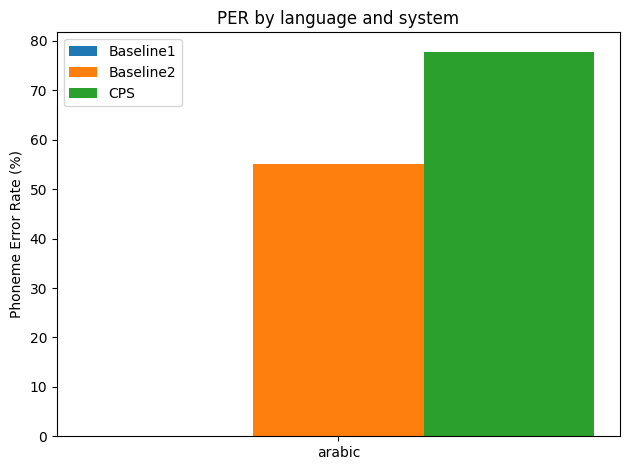

In [68]:
import json
import matplotlib.pyplot as plt

systems = {
    "arabic": {
        "baseline1": "outputs/mono_persian.json",
        "baseline2": "outputs/multi_no_cps_arabic.json",
        "cps":       "persian_parsed.json",
        "groundtruth": "ground_truth/persian.json"
    },
#     {
#     "baseline1": "outputs/mono_{}.json",
#     "baseline2": "outputs/multi_no_cps_persian.json",
#     "cps": "{}_parsed.json",
#     "gt": "ground_truth/{}.json"
# }
    # "persian": {
    #     "baseline1": "outputs/mono_persian.json",
    #     "baseline2": "outputs/multi_no_cps_persian.json",
    #     "cps":       "outputs/cps_persian.json",
    #     "groundtruth": "ground_truth/persian.json"
    # },
    # "urdu": {
    #     "baseline1": "outputs/mono_urdu.json",
    #     "baseline2": "outputs/multi_no_cps_urdu.json",
    #     "cps":       "outputs/cps_urdu.json",
    #     "groundtruth": "ground_truth/urdu.json"
    # }
}

def load_json(f):
    with open(f, encoding='utf-8') as jf:
        return json.load(jf)

def run_eval():
    per_scores = {}
    for lang, files in systems.items():
        gt = load_json(files["groundtruth"])
        lang_per = []
        for sys in ["baseline1", "baseline2", "cps"]:
            try:
                pred = load_json(files[sys])
                acc, _, _, _ = compute_metrics(gt, pred)
                per = (1 - acc) * 100
            except Exception as e:
                print(f"[WARN] Skipping {lang}-{sys}: {e}")
                per = 100.0
            lang_per.append(per)
        per_scores[lang] = lang_per
    return per_scores

def plot_bar_chart(per_scores):
    import numpy as np
    langs = list(per_scores.keys())
    systems = ['Baseline1', 'Baseline2', 'CPS']
    data = [per_scores[lang] for lang in langs]

    x = np.arange(len(langs))
    bar_width = 0.25
    fig, ax = plt.subplots()
    for i, label in enumerate(systems):
        vals = [d[i] if len(d) > i else 100.0 for d in data]
        ax.bar(x + i * bar_width, vals, bar_width, label=label)

    ax.set_ylabel('Phoneme Error Rate (%)')
    ax.set_title('PER by language and system')
    ax.set_xticks(x + bar_width)
    ax.set_xticklabels(langs)
    ax.legend()
    plt.tight_layout()
    plt.savefig("figures/per_bar_chart.png")
    plt.show()

if __name__ == "__main__":
    per_scores = run_eval()
    plot_bar_chart(per_scores)


In [69]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, confusion_matrix
import numpy as np

def is_valid_phoneme(p):
    return p.isalpha()

def evaluate_phonemes(gt_dict, pred_dict, strict_alignment=True):
    y_true, y_pred = [], []

    for word, gt_seq in gt_dict.items():
        pred_seq = pred_dict.get(word, [])
        gt_clean = [p for p in gt_seq if is_valid_phoneme(p)]
        pr_clean = [p for p in pred_seq if is_valid_phoneme(p)]

        if strict_alignment:
            if len(gt_clean) != len(pr_clean):
                continue  # skip misaligned
        min_len = min(len(gt_clean), len(pr_clean))
        y_true.extend(gt_clean[:min_len])
        y_pred.extend(pr_clean[:min_len])

    if not y_true or not y_pred:
        return {
            "accuracy": 0.0,
            "precision": 0.0,
            "recall": 0.0,
            "f1": 0.0,
            "per": 1.0,
            "confusion": None,
        }

    acc = accuracy_score(y_true, y_pred)
    precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='macro', zero_division=0)
    cm = confusion_matrix(y_true, y_pred, labels=list(sorted(set(y_true + y_pred))))
    return {
        "accuracy": acc,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "per": 1 - acc,
        "confusion": cm
    }


In [71]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt

# langs = ["arabic", "persian", "urdu"]
langs = ["arabic"]

systems = ["baseline1", "baseline2", "cps"]

paths = {
    "baseline1": "outputs/mono_{}.json",
    "baseline2": "outputs/multi_no_cps_urdu.json",
    "cps": "{}_parsed.json",
    "gt": "ground_truth/{}.json"
}

def load_json(path):
    with open(path, encoding='utf-8') as f:
        return json.load(f)

def evaluate_all(strict=True):
    rows = []
    for lang in langs:
        gt = load_json(paths["gt"].format(lang))
        for sys in systems:
            try:
                pred = load_json(paths[sys].format(lang))
                result = evaluate_phonemes(gt, pred, strict_alignment=strict)
                rows.append({
                    "language": lang,
                    "system": sys,
                    "PER (%)": round(result["per"] * 100, 2),
                    "F1": round(result["f1"], 4),
                    "Precision": round(result["precision"], 4),
                    "Recall": round(result["recall"], 4),
                })
            except Exception as e:
                print(f"[WARN] Failed for {lang}-{sys}: {e}")
    return pd.DataFrame(rows)

def plot_per(df):
    pivot = df.pivot(index="language", columns="system", values="PER (%)")
    pivot.plot(kind='bar')
    plt.ylabel("Phoneme Error Rate (%)")
    plt.title("PER by language and system")
    plt.tight_layout()
    plt.savefig("figures/per_bar_chart.png")
    plt.show()

if __name__ == "__main__":
    df = evaluate_all(strict=True)
    print(df.to_markdown(index=False))
    df.to_csv("figures/eval_summary.csv", index=False)
    plot_per(df)


| language   | system    |   PER (%) |     F1 |   Precision |   Recall |
|:-----------|:----------|----------:|-------:|------------:|---------:|
| arabic     | baseline1 |      0    | 1      |      1      |   1      |
| arabic     | baseline2 |     51.31 | 0.228  |      0.2308 |   0.2256 |
| arabic     | cps       |     58.92 | 0.1831 |      0.1861 |   0.1803 |


AttributeError: 'Index' object has no attribute '_format_native_types'